# Linear Regression

Today we will start working on our first Machine Learning model: Linear Regression.

# Table of contents
[1. Linear Regression](#1.-Linear-Regression)
- [1.1 Linear regression for income in Year 1 using parents' average age at the time of birth as predictor](#1.1-Linear-regression-for-income-in-Year-1-using-parents'-average-age-at-the-time-of-birth-as-predictor)
- [1.2 Plotting the data](#1.2-Plotting-the-data)
- [1.3 Splitting data into train and test sets](#1.3-Splitting-data-into-train-and-test-sets)
- [1.4 Running the linear regression algorithm](#1.4-Running-the-linear-regression-algorithm)
- [1.5 Evaluating the linear regression model](#1.5-Evaluating-the-linear-regression-model)


[2. Multiple Linear Regression](#2.-Multiple-Linear-Regression)
- [2.1 Multiple linear regression for income in Year 1 using mother's and father's ages at the time of birth as predictor](#2.1-Multiple-linear-regression-for-income-in Year-1-using-mother's-and-father's-ages-at-the-time-of-birth-as-predictor)
- [2.2 Plotting the data](#2.2-Plotting-the-data)
- [2.3 Splitting data into train and test sets](#2.3-Splitting-data-into-train-and-test-sets)
- [2.4 Running the multiple linear regression algorithm](#2.4-Running-the-multiple-linear-regression-algorithm)
- [2.5 Evaluation and generalization](#2.5-Evaluation-and-generalization)



# 1. Linear Regression

Linear regression models the relationship between a continuous variable (called the outcome or the dependent variable) and one explanatory variable (called predictor or independent variable). 

In linear regression, we plot the data on a scatter plot and then compute the best-fit line through the data points. The term "best-fit" refers to the fact that the resulting line minimizes the squared distance between the data points and the line. This will become more clear as we work through the examples below.

The best-fit line is described by the equation:

$$Y = c_0 + c_1 X$$

where $c_0$ is the regression coefficient associated with the value of $Y$ when $X=0$ and $c_1$ is the regression coefficient that tells us by how much $Y$ changes for every increase of one unit in $X$. You can also think of $c_0$ as the y-intercept of the best-fit line and $c_1$ is its slope. 

The best-fit line provides what is known as a linear model which allows us to make predictions about the value of $Y$ given the value of $X$.

In [1]:
# First, we load the libraries we will need for this notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.stats as stats # this library provides functions for performing statistics on data
import pandas as pd
import numpy as np
import sys
import sklearn # this library provides functions for performing machine learning on data
import ff_functions as fff # this is the library we are providing for you to perform common operations on data

In [2]:
# We read in the Fragile Families data as in previous notebooks
background = "../../ai4all_data/background.csv"
data_frame = pd.read_csv(background, low_memory=False)
# We set the index of the DataFrame to match the challengeID
data_frame = data_frame.set_index('challengeID')

# 1.1 Using linear regression to predict household income based on age

In this section we will build a linear regression model to predict the household income reported by the father at the time of birth ('cf1hhinc'). As a predictor, we will use a new engineered feature, which combines the mother's and father's age at the time of child's birth (features 'cm1age' and 'cf1age'). 

### Discuss with your partner:
- Do you think it is possible to predict household income based solely on age? Why or why not?
- Can you think of better variables that we could use to predict income?
- Do you think it matters if we try to predict housold income as reported by the father or by the mother? Do you expect these reported values to be the same? 

### Answer:

### Subselecting variables

In [3]:
# Pick mother's age (cm1age), father's age (cf1age), and father reported income (f211)
age_income = fff.pick_ff_variables(data_frame, ["cm1age", "cf1age", "cf1hhinc"], 
                                   remove_nans=True, remove_negatives=True)

# Let's change the names of the columns so it's easier for us to work with the data
age_income.columns = ["Mother_age", "Father_age", "HH_Income"]

age_income.describe()

Data frame with  2447  rows and  3 columns.


,Mother_age,Father_age,HH_Income
count,2447.000000,2447.000000,2447.000000
mean,24.722109,27.934614,39303.084838
std,5.657181,6.283294,35503.178656
min,15.000000,16.000000,0.000000
25%,20.000000,23.000000,14081.728771
50%,23.000000,27.000000,29882.437833
75%,29.000000,32.000000,52830.225588
max,43.000000,51.000000,155321.448562


Household income considers the income of all adults living in the same house. Here, we will use the average age of the parents as a predictor. (Recall "feature engineering" - the last part in lecture 3.1)

### Discuss with your partner:
- Why would the parents' average age be a better predictor than using the father's age only? Can you think of situations where the parents' average age is a worse predictor than the father's age only?

### Answer:

In [4]:
# Here we add a new column to the DataFrame that contains the parents' average age
age_income["Average_age"] = (age_income.Mother_age + age_income.Father_age)/2
age_income.head()

,Mother_age,Father_age,HH_Income,Average_age
challengeID,,,,
3,23,24,130371.370499,23.5
4,22,24,11331.688226,23.0
5,19,19,3193.700253,19.0
6,18,20,63816.431501,19.0
8,21,26,106779.672856,23.5


# 1.2 Plotting the data
Let's plot the data using the scatterplot function we learned.

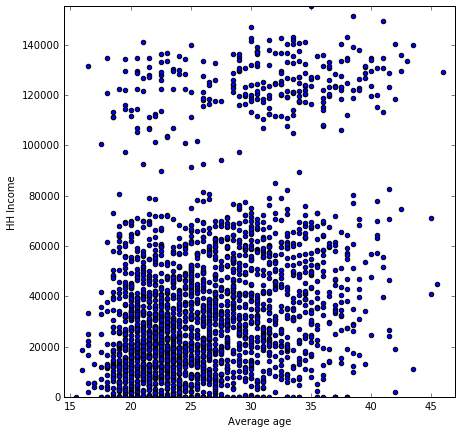

In [5]:
fff.scatterplot(age_income.Average_age, age_income.HH_Income, xlabel = "Average age", ylabel = "HH Income")

# 1.3 Splitting data into train and test sets

In [6]:
# First, let's split our data into train and test sets
from sklearn.cross_validation import train_test_split

X = age_income.Average_age # predictor
y = age_income.HH_Income # outcome 
# The following line of code randomly splits both the outcome data and the predictor data into 
# a training and a testing set. The test_size argument is a number between 0 and 1 that tells the 
# function the percentage of data that should go into the test set.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=100)

print(age_income.shape)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(2447, 4)
(1712,)
(735,)
(1712,)
(735,)


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Note that the train and test data sets appear to have no columns! This is because the resultingd 1-column data sets are not DataFrames but what is known as a Pandas Series. Series are very similar to DataFrames and you don't need to worry too much about them. If you want to learn more, check out the Pandas doc page: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.html.

We'll be using the sklearn package to perform linear regression (http://scikit-learn.org/)

Sklearn functions take in 2D numpy arrays rather than 1D Pandas Series. Let's convert our Series such that we can run them with sklearn. 

In [7]:
# change the format of train_X and train_y so sklearn doesn't complain
'''
This function converts a pandas 1D series to a numpy 2D array (for reference, see lecture 2.2),
which can be used with sklearn functions
'''
def pandas_to_2d_numpy(pandas_df):
    num_rows = pandas_df.shape[0]
    # cast the Pandas Series to a numpy array (because sklearn works with numpy)
    numpy_df = np.array(pandas_df) # remove title
    # expand the number of dimensions (from (d,0) to (d,1)) - 1d list to 2d list
    if len(pandas_df.shape) == 1:
        numpy_df = numpy_df.reshape(num_rows,1)
    return numpy_df

In [8]:
numpy_train_X = pandas_to_2d_numpy(train_X)
numpy_train_y = pandas_to_2d_numpy(train_y)

numpy_test_X = pandas_to_2d_numpy(test_X)
numpy_test_y = pandas_to_2d_numpy(test_y)

# 1.4 Running the linear regression algorithm

**Let's do linear regression with `sklearn.linear_model.LinearRegression`** You can learn about this function at 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


slope = 2355.275777043688
y-intercept = -22973.162640478462


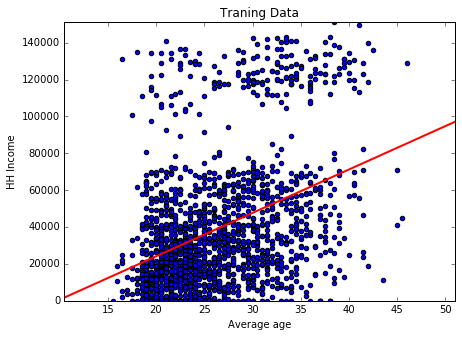

In [9]:
# import the linear_model function from sklearn
from sklearn import linear_model

# intialize the model
reg = linear_model.LinearRegression()

# fit the model ON THE TRAINING DATA (important!)
reg.fit(numpy_train_X, numpy_train_y)

# read the resulting model's slope and intercept values
slope = reg.coef_[0][0]
intercept = reg.intercept_[0]

# print the linear regression model coefficients
print('slope = {}'.format(slope))
print('y-intercept = {}'.format(intercept))

# plot the regression line along with the data points 
# (for a full description of this edited scatterplot, see ff_functions.py)
fff.scatterplot_with_line(numpy_train_X, numpy_train_y, slope, intercept,
                          xlabel = "Average age", ylabel = "HH Income", title="Traning Data")

### Discuss with your partner:
- Why is the best-fit line not going through any of the points above $100,000?

### Answer:

### Question 1.4.1
Based on our linear regression model, what is the predicted household income for parents with average age = 20?

### Answer:

# 1.5 Evaluating the linear regression model
We will use the $R^2$ score to quantify the performance of our model. Note that we always test the performance of the model using the testing data set (not the training data set).

In [10]:
# First we use our model to predict the testing data. That is, we pass the average age of parents in the 
# testing set (x_test) and predict household income (y_pred).
pred_y = reg.predict(numpy_test_X)
# Note that we used the sklearn function predict. This function is simply using our model y = m*x + b and
# applying it to the test data:
pred_y2 = slope*numpy_test_X + intercept
print('Difference between predictions: {}'.format(sum(pred_y-pred_y2)) )

Difference between predictions: [ 0.]


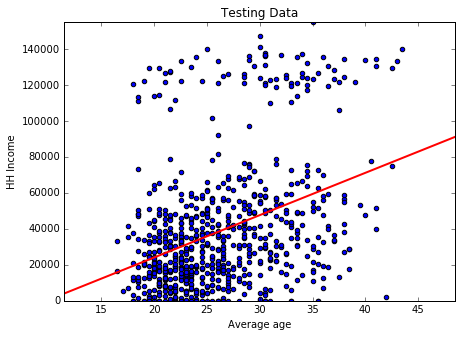

In [11]:
# Let's visualize how our model fits the testing data
fff.scatterplot_with_line(test_X,test_y, slope, intercept,
                          xlabel = "Average age", ylabel = "HH Income", title="Testing Data")

In [12]:
# Now, we can quantify how good our model is at predicting new values by computing R2 score
R2 = sklearn.metrics.r2_score(test_y, pred_y)
print('mean root of square error : {}'.format(R2))

mean root of square error : 0.13546399844615264


Our model can explain 13.5% of the total variation in the testing data set. Although that does not seem high, it is a good start. We could improve the model by selecting a better predictor.

We can also ask the following question: How well does the model matches the training data?
This is often useful, as it provides information on how well the model can learn to approximate the training data. But always keep in mind that this **is not the same as algorithm performance** - as we always need to test our model with new data after training.

In [13]:
pred_train_y = reg.predict(numpy_train_X)
R2 = sklearn.metrics.r2_score(train_y, pred_train_y)
print('mean root of square error : {}'.format(R2))


mean root of square error : 0.14768705538325988


### Question 1.5.1:
Compare the performance on train and test data. Do you expect the model to always be better at explaining the training data than the testing data? Why or why not?
### Answer:

### Problem 1.5.1
Build a linear regression model that predicts the household income based solely on the age of the father 
(hint: Repeat the following steps:)

* plot the data
* create a train and test split
* convert the splits to numpy arrays using **`fff.pandas_to_2d_numpy(pandas_series)`**
* train the regression model on the train data
* test the regression model on the test data
* test the regression model on the train data (for sanity check)
* how good is your model?

### Question 1.5.2
Which variable is a better predictor of household income: average parents' age or father's age?

Why do you think this is the case?

### Answer:

# 2. Multiple Linear Regression

Multiple linear regression is a generalization of linear regression. In multiple linear regression we model the relationship between a continuous variable (called the outcome or the dependent variable) and multiple explanatory variables (called predictors or independent variables). 

The multiple linear regression model takes into account the effects of multiple predictors $X_1,X_2,\dots,X_n$ and is described by the equation:

$$Y = c_0 + c_1 X_1 + c_2 X_2 + c_3 X_3 + \dots + c_n X_n$$

where $c_0$ is the regression coefficient associated with the value of $Y$ when $X=0$, and $c_i$ where $i = 1,2,3,\dots,n$ is the regression coefficient that tells us by how much $Y$ changes when the predictor $X_i$ changes by one unit.

The model allows us to make predictions about the value of $Y$ given the values of the multiple predictors $X_i$.

# 2.1 Multiple linear regression for income in Year 1 using mother's and father's ages at the time of birth as predictor 
In this section we will build a multiple linear regression model to predict the family's income in year 2 ('f2l1'). As a predictor, we will use the mother's age at the time of child's birth (feature 'cm1age') as well as father's age at the time of child's birth (feature 'cf1age').

Let's remind ourselves what the data frame looks like:

In [14]:
age_income.head()

,Mother_age,Father_age,HH_Income,Average_age
challengeID,,,,
3,23,24,130371.370499,23.5
4,22,24,11331.688226,23.0
5,19,19,3193.700253,19.0
6,18,20,63816.431501,19.0
8,21,26,106779.672856,23.5


# 2.2 Plotting the data
We can visualize the mother's age, father's age and income in one 3D plot (which can also be found by calling **`fff.scatter_3d()`**). 

In [15]:
from mpl_toolkits.mplot3d import Axes3D

'''
This function takes in three arrays of equal length (xdata, ydata, zdata)
and plots them against each other in a 3D scatterplot

Required:
xdata: a column of a Pandas DataFrame, data to be plotted against the x axis
ydata: a column of a Pandas DataFrame, data to be plotted against the y axis
xdata: a column of a Pandas DataFrame, data to be plotted against the x axis
(must all be same length)

Additional (with default values filled in):
xlabel: label for the x axis (string)
ylabel: label for the y axis (string)
zlabel: label for the z axis (string)
title: plot title (string)
slope: 2d list with x and y slopes, to plot a line
intercept: a float or int with z-intercept, to plot a line
'''
def scatter_3d(xdata, ydata, zdata, xlabel="", ylabel="", zlabel="", title="", slope=None, intercept=None):
    
    # choose figure size
    fig = plt.figure(figsize=(7,7))
    
    # create a "subplot" and make it 3d
    ax = fig.add_subplot(111, projection='3d')
    ax.axis('equal')
    
    # plot the data
    ax.scatter(xdata, ydata, zdata)
    
    # set the selected labels for x and y axes, and title (empty by default)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    
    # optionally: draw a line, when slope and intercept provided
    if (slope is not None) and (intercept is not None):
        x = np.linspace(min(xdata)-1,max(xdata)+1, 100)
        y = np.linspace(min(ydata)-1,max(ydata)+1, 100)
        ax.plot(x, y, slope[0]*x+slope[1]*y+intercept,lw=2,c='r')

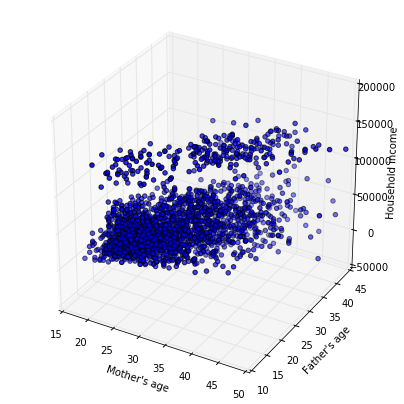

In [16]:
scatter_3d(age_income.Father_age, age_income.Mother_age, age_income.HH_Income, xlabel="Mother's age", \
           ylabel="Father's age", zlabel = "Household income")

# 2.3 Splitting data into train and test sets
Let's again split our data into train and test sets, and try to find the best fit line.

In [17]:
# Split our data into train and test sets
from sklearn.cross_validation import train_test_split

X = age_income[["Mother_age","Father_age"]] # predictor
y = age_income[["HH_Income"]] # outcome 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=100)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1712, 2)
(735, 2)
(1712, 1)
(735, 1)


In [18]:
numpy_train_X = pandas_to_2d_numpy(train_X)
numpy_train_y = pandas_to_2d_numpy(train_y)

numpy_test_X = pandas_to_2d_numpy(test_X)
numpy_test_y = pandas_to_2d_numpy(test_y)

# 2.4 Running the multiple linear regression algorithm
In this section, we'll again use `sklearn.linear_model.LinearRegression` to do multiple linear regression.

In [19]:
# fit the linear regression model and get the slope and intercept
multireg = linear_model.LinearRegression()
multireg.fit(numpy_train_X, numpy_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We denote $X_!$ and $X_2$ as two features `Mother_age_0` and `Father_age_0`. Then the multiple regression model can be written as 

$y = c_0 + c_1 X_1 + c_2 X_2$

The coefficients can be retrieved from the fitted model.


In [20]:
# select slope and intercept values
slope = multireg.coef_[0]
intercept = multireg.intercept_[0]

# print the generated coefficients
print('[c1, c2] = {}'.format(slope))
print('c0 = {}'.format(intercept))

[c1, c2] = [ 2269.73514476   187.17289034]
c0 = -22316.248746983365


### Question 2.4.1
Is the mother's age or the father's age more important in predicting the income?

### Answer:

Plot the 3D scatterplot with the slope and intercept

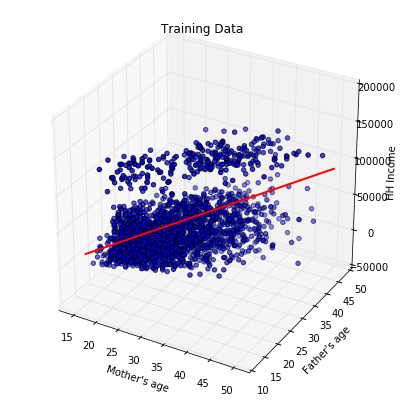

In [21]:
scatter_3d(age_income.Father_age, age_income.Mother_age, age_income.HH_Income, xlabel="Mother's age", \
           ylabel="Father's age", zlabel = "HH Income", title="Training Data", slope=slope, intercept=intercept)

# 2.5 Evaluation and generalization

We can use this model to predict the income for parents in the test set.

In [22]:
pred_y = multireg.predict(numpy_test_X)
# Note we could have also done the same thins using the model equation:
# pred_y = slope[0]*multi_numpy_test_X[:,0]+slope[1]*multi_numpy_test_X[:,1]+intercept

# calculate R2 score
R2 = sklearn.metrics.r2_score(numpy_test_y, pred_y)

print('Multiple regression results on TEST data')
print('R2 : {}'.format(R2))

Multiple regression results on TEST data
R2 : 0.1374004547483919


Now, as a sanity check, calculate mean square error ON THE TRAIN DATA.

In [23]:
pred_train_y = multireg.predict(numpy_train_X)
# Note we could have also done the same thins using the model equation:
# pred_y = slope[0]*multi_numpy_test_X[:,0]+slope[1]*multi_numpy_test_X[:,1]+intercept

# calculate R2 score
R2 = sklearn.metrics.r2_score(numpy_train_y, pred_train_y)

print('Multiple regression results on TRAIN data')
print('R2 : {}'.format(R2))

Multiple regression results on TRAIN data
R2 : 0.1585642197343511


### Question 2.5.1:
Compare the performance on train and test data. Does the algorithm generalize well? Are the results better or worse than at our earlier (non-multiple-regression) attempts?
### Answer:

## TODO: Problem
Redo the same with removing unmarried couples

## TODO: Problem
Back to regular linear regression. Create a feature where you reweigh the mother's and father's age in the ratio that comes out of the multiple regression. Run regression now. Did results improve? Are they similar to multiple regression? Why?